In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [55]:
df = pd.read_csv('E:\\machine learning\\Housepriceprediction.csv')
df.corr()

,Id,LotArea,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.033226,-0.028365,0.010496,0.008273,0.027239,0.016570,0.017634,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.299475,0.263116,0.190015,0.154871,0.180403,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.476224,0.593007,0.427452,0.600671,0.562022,0.790982
1stFlrSF,0.010496,0.299475,0.476224,1.000000,0.566024,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.008273,0.263116,0.593007,0.566024,1.000000,0.825489,0.467247,0.468997,0.708624
TotRmsAbvGrd,0.027239,0.190015,0.427452,0.409516,0.825489,1.000000,0.362289,0.337822,0.533723
GarageCars,0.016570,0.154871,0.600671,0.439317,0.467247,0.362289,1.000000,0.882475,0.640409
GarageArea,0.017634,0.180403,0.562022,0.489782,0.468997,0.337822,0.882475,1.000000,0.623431
SalePrice,-0.021917,0.263843,0.790982,0.605852,0.708624,0.533723,0.640409,0.623431,1.000000


In [56]:
x = df.LotArea
y = df.SalePrice

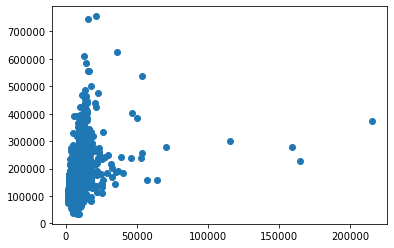

In [57]:
plt.scatter(x, y)

In [58]:
# let y = c0 + c1*x+ c2x**2
c = np.ones(3)
def h():
    h = c[0] + c[1]*x + c[2]*x*x
    return h
def  costfun ():
    j = (sum(np.square(c0 + c1*x + c2*x*x - y)))/(2*len(x))
    return j

[8.02859524e-01 7.55673514e-01 1.53206811e-05]


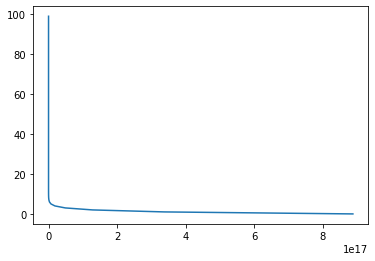

In [59]:
p = np.zeros(3)
e = []
itr = 100
l = 0.0000000000000000000001
c = np.random.random(3)
for i in range(itr):
    p[0] = c[0] - l*(sum(c[0] + c[1]*x + c[2]*x*x - y))
    p[1] = c[1] - l*sum((h() - y)*x)
    p[2] = c[2] - l*sum((h() - y)*x*x)
    error = (sum(np.square(c[0] + c[1]*x + c[2]*x*x - y)))/(2*len(x))
    e.append(error)
    c = p.copy()     
plt.plot(e,np.arange(itr));
print(c)

In [60]:
R2 = 1 - (sum(np.square(y - h()))/sum(np.square(y - y.mean())))
R2

-4.605256136517061

In [61]:
h()

0        7480.178981
1        8667.222559
2       10441.153588
3        8614.769332
4       13892.130892
            ...     
1455     6943.753336
1456    12616.174799
1457     8086.187399
1458     8790.262463
1459     9022.755423
Name: LotArea, Length: 1460, dtype: float64

In [62]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [63]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [64]:
X = df.iloc[:,1].values
x1= X.reshape(-1,1)
x1

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]], dtype=int64)

# Polyn omial Regression with one features

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(x1)
poly_reg_modl = LinearRegression()
poly_reg_modl.fit(poly_features,y)
y_predict = poly_reg_modl.predict(poly_features)
y_predict

array([172280.36803008, 178642.27849294, 187643.04470688, ...,
       175564.46330738, 179285.45259371, 180492.79865854])

In [66]:
from sklearn.metrics import r2_score
r2_score = r2_score(y, y_predict)
r2_score

0.13610758142019386

# Polynomial Regression with two features

In [67]:
x0 = df.iloc[:,1]
x1 = df.iloc[:,2]
data = pd.DataFrame({'x0':x0, 'x1':x1, 'y':y})
data

,x0,x1,y
0,8450,7,208500
1,9600,6,181500
2,11250,7,223500
3,9550,7,140000
4,14260,8,250000
...,...,...,...
1455,7917,6,175000
1456,13175,6,210000
1457,9042,7,266500
1458,9717,5,142125


In [68]:
X,Y = data[['x0', 'x1']], data.y
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_fit = poly.fit_transform(X)
poly_reg_modl.fit(poly_fit, Y)
y_predict = poly_reg_modl.predict(poly_fit)
y_predict

array([206749.65584735, 163637.93919901, 215148.45325725, ...,
       208543.17800956, 129861.38950894, 130565.10355541])

In [69]:
from sklearn.metrics import r2_score
r2_score = r2_score(y,y_predict)
r2_score

0.723865595452269